Loading data set

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
df = pd.read_csv("data/survey lung cancer.csv")

Checking wether we have missing value

In [2]:
len(df[df.values == 'x'])

14

We have 14 missing values.As it is not a great number, we can easily drop the rows which have missing data

In [3]:
df.drop(df[df.values == 'x'].index, inplace=True)

Next we need to encode last and first column to numeric.We encode YES as 2 and NO as 1 and 1 as man and 2 as woman

In [4]:
df["LUNG_CANCER"].replace({"YES" : 2, "NO":1}, inplace=True)
df["GENDER"].replace({"M" : 1, "F" : 2}, inplace=True)
df = df.astype('int64')

No we have to visulaize features to select best feature set to train model

In [5]:
palette = {1 : 'blue', 2 : 'red'}
# sns.pairplot(df, vars=df.columns[0:14], hue="LUNG_CANCER", palette=palette)

We observe that for example age has a good contribution to label.But here we use all features to train the model

In [6]:
Y = df["LUNG_CANCER"].to_numpy()
X = df.drop(["LUNG_CANCER"], axis = 1).to_numpy()

Now we make a classifier class which implements naive bayes classifier.

In [7]:
class NaiveBayes:
    def fit(self, X, Y):
        numberOfSamples, numberOfFeatures = X.shape
        self.labels = np.unique(Y)
        numberOfClasses = len(self.labels)
        self.mean = np.zeros((numberOfClasses, numberOfFeatures), dtype=np.float64)
        self.variance = np.zeros((numberOfClasses, numberOfFeatures), dtype=np.float64)
        self.perior = np.zeros(numberOfClasses, dtype=np.float64)
        
        for index, i in enumerate(self.labels):
            X_i = X[Y == i]
            self.perior[index] = X_i.shape[0] / float(numberOfSamples)
            self.mean[index, :] = X_i.mean(axis=0)
            self.variance[index, :] = X_i.var(axis=0)

    def gaussianPdf(self, index, x):
        mean = self.mean[index]
        var = self.variance[index]
        return (np.exp(-((x - mean) ** 2) / (2 * var))) / (np.sqrt(2 * np.pi * var))

    def findArgMax(self, x):
        posteriors = []
        for index, i in enumerate(self.labels):
            prior = np.log(self.perior[index])
            posterior = np.sum(np.log(self.gaussianPdf(index, x)))
            posteriors.append(prior + posterior)
        return self.labels[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self.findArgMax(x) for x in X])


evalutaion function

In [8]:
def evaluate_classification(y_pred, y_test):
    truePositive = np.sum((y_pred == 2) & (y_test == 2))
    falsePositive = np.sum((y_pred == 2) & (y_test == 1))
    trueNegative = np.sum((y_pred == 1) & (y_test == 1))
    falseNegative = np.sum((y_pred == 1) & (y_test == 2))

    print(f"Accuracy: {((trueNegative + truePositive)/len(y_test)):.4f}")
    print(f"Precision: {((truePositive) / (truePositive + falsePositive)):.4f}")
    print(f"Recall: {((truePositive) / (truePositive + falseNegative)):.4f}")
    print("Confusion Matrix:")
    conf_matrix = np.array([[truePositive, falseNegative], [falsePositive, trueNegative]])
    sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=False, xticklabels=["YES", "NO"], yticklabels=["YES", "NO"])
    plt.ylabel('true label')
    plt.xlabel('predicted label')

Accuracy: 0.8305
Precision: 0.9000
Recall: 0.9000
Confusion Matrix:


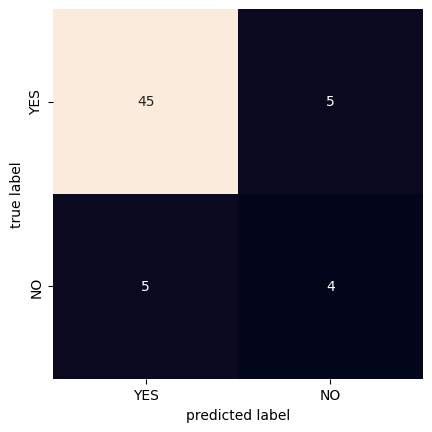

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, random_state=12
)
nb = NaiveBayes()
nb.fit(X_train, y_train)
prediction = nb.predict(X_test)
evaluate_classification(prediction, y_test)

Accuracy: 0.8305
Precision: 0.9000
Recall: 0.9000
Confusion Matrix:


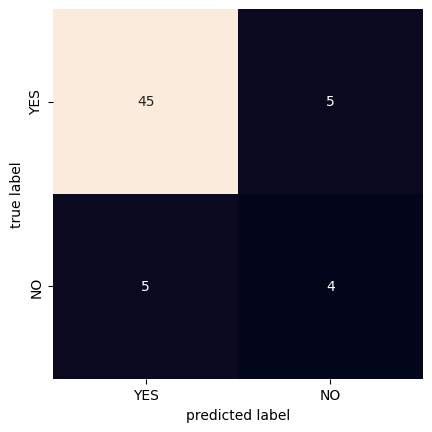

In [10]:

clf = GaussianNB()  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_classification(y_pred, y_test)

Note:definition of confusion matrix and precision and recall in sklearn is different from slides